In [1]:
# !pip install opencv-python

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import tqdm

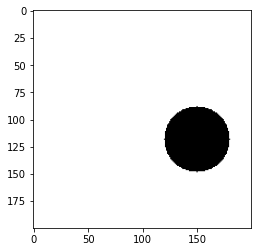

In [5]:
image_size = 200
rad = random.randint(5,50)
c_x = random.randint(rad, image_size-rad)
c_y = random.randint(rad, image_size-rad)
blank_image = np.ones(shape=[image_size, image_size], dtype=np.uint8)
cv2.circle(blank_image, (c_x, c_y), rad, 0, -1)
plt.imshow(blank_image,cmap='gray')

In [7]:
def create_training_Date():
    
    l = 10000;
    x_train = np.zeros(shape=[l, image_size, image_size, 1])
    y_train = np.zeros(shape=[l, 3])
    
    for i in range(l):
        rad = random.randint(5, 50)
        c_x = random.randint(rad, image_size-rad)
        c_y = random.randint(rad, image_size-rad)
        
        y_train[i, 0] = c_x/image_size
        y_train[i, 1] = c_y/image_size
        y_train[i, 2] = rad/image_size
        
        blank_image = np.ones(shape=[image_size, image_size], dtype= np.uint8)
        x_train[i,:,:,0] = cv2.circle(blank_image, (c_x, c_y), rad, 0, -1)
        
    return {'x_train': x_train, 'y_train': y_train}

In [8]:
training_data = create_training_Date()

In [9]:
training_data

{'x_train': array([[[[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]],
 
         [[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]],
 
         [[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]],
 
         ...,
 
         [[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]],
 
         [[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]],
 
         [[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]]],
 
 
        [[[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]],
 
         [[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]],
 
         [[1.],
          [1.],
          [1.],
          

array([123., 106.,  43.])

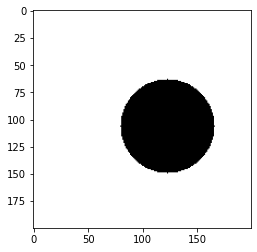

In [12]:
plt.imshow(training_data['x_train'][200].reshape(200,200), cmap='gray')
image_size*training_data['y_train'][200]

In [13]:
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras import Model

In [18]:
img_input = layers.Input(shape=(image_size, image_size, 1))

x = layers.Conv2D(5,3, activation='relu', strides=1, padding='same')(img_input)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(10,3, activation='relu', strides=1, padding='same')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(20,3, activation='relu', strides=1, padding='same')(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(3,5, activation='relu', strides=1, padding='same')(x)

x = layers.Flatten()(x)

output = layers.Dense(3, activation='relu')(x)

model = Model(img_input, output)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 200, 200, 1)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 200, 200, 5)       50        
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 100, 100, 5)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 100, 100, 10)      460       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 50, 50, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 50, 50, 20)        1820

In [19]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [35]:
hist = model.fit(training_data['x_train'], training_data['y_train'], epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
250/250 [==============================] - 2s 9ms/step - loss: 9.2727e-05 - mse: 9.2727e-05 - val_loss: 1.0938e-04 - val_mse: 1.0938e-04
Epoch 2/20
250/250 [==============================] - 2s 10ms/step - loss: 1.0267e-04 - mse: 1.0267e-04 - val_loss: 1.3715e-04 - val_mse: 1.3715e-04
Epoch 3/20
250/250 [==============================] - 2s 9ms/step - loss: 8.4148e-05 - mse: 8.4148e-05 - val_loss: 8.4506e-05 - val_mse: 8.4506e-05
Epoch 4/20
250/250 [==============================] - 2s 10ms/step - loss: 7.4136e-05 - mse: 7.4136e-05 - val_loss: 1.0287e-04 - val_mse: 1.0287e-04
Epoch 5/20
250/250 [==============================] - 2s 10ms/step - loss: 6.7568e-05 - mse: 6.7568e-05 - val_loss: 1.0774e-04 - val_mse: 1.0774e-04
Epoch 6/20
250/250 [==============================] - 2s 9ms/step - loss: 6.6870e-05 - mse: 6.6870e-05 - val_loss: 9.9649e-05 - val_mse: 9.9649e-05
Epoch 7/20
250/250 [==============================] - 2s 10ms/step - loss: 8.4616e-04 - mse: 8.4616e-04 - val

In [36]:
preds = model.predict(training_data['x_train'][3].reshape(1, image_size, image_size, 1))

In [37]:
preds

array([[0.59262633, 0.06562504, 0.02447081]], dtype=float32)

In [38]:
preds* image_size

array([[118.52527  ,  13.125009 ,   4.8941627]], dtype=float32)

In [39]:
image_size * training_data['y_train'][3]

array([118.,  12.,   5.])

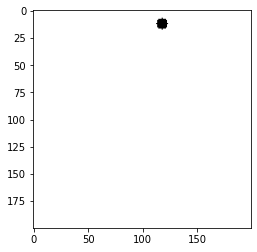

In [40]:
plt.imshow(training_data['x_train'][3].reshape(200,200), cmap='gray')

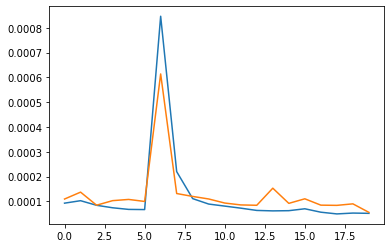

In [41]:
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])